<a href="https://colab.research.google.com/github/NovicePython2004/IS4487/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Load your uploaded file (path "/content/listings.csv.gz") 🔧


In [52]:
df = pd.read_csv("/content/listings.csv.gz")
print(df.head())

      id                         listing_url       scrape_id last_scraped  \
0  27966  https://www.airbnb.com/rooms/27966  20250928035310   2025-09-28   
1  29130  https://www.airbnb.com/rooms/29130  20250928035310   2025-09-29   
2  29849  https://www.airbnb.com/rooms/29849  20250928035310   2025-09-29   
3  29856  https://www.airbnb.com/rooms/29856  20250928035310   2025-09-29   
4  31023  https://www.airbnb.com/rooms/31023  20250928035310   2025-09-29   

            source                                               name  \
0      city scrape                       Heraklion-Pinelopi Apartment   
1      city scrape  Villa Kallergi-Athena,12 guest Concert Piano&Pool   
2      city scrape                  Villa Kallergi - Nefeli, 6 guests   
3  previous scrape              Matala Dimitris Villa - Four Bed Room   
4      city scrape            Chryssoula Guesthouse balcony (200mbps)   

                                         description  \
0  For an unforgettable stay!! Just 10 min

## 2. Explore Missing Values

### Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

### Do the following:
Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



Count of missing values per column (only showing columns with missing values):
calendar_updated                27582
neighbourhood_group_cleansed    27582
host_neighbourhood              23866
host_about                      14614
neighbourhood                   13187
neighborhood_overview           13187
host_location                    9297
review_scores_cleanliness        4838
review_scores_communication      4837
review_scores_checkin            4837
review_scores_value              4837
review_scores_location           4837
review_scores_accuracy           4837
last_review                      4835
review_scores_rating             4835
first_review                     4835
reviews_per_month                4835
host_response_time               3875
host_response_rate               3875
beds                             3218
estimated_revenue_l365d          3205
price                            3205
bathrooms                        3204
host_acceptance_rate             2822
host_is_s

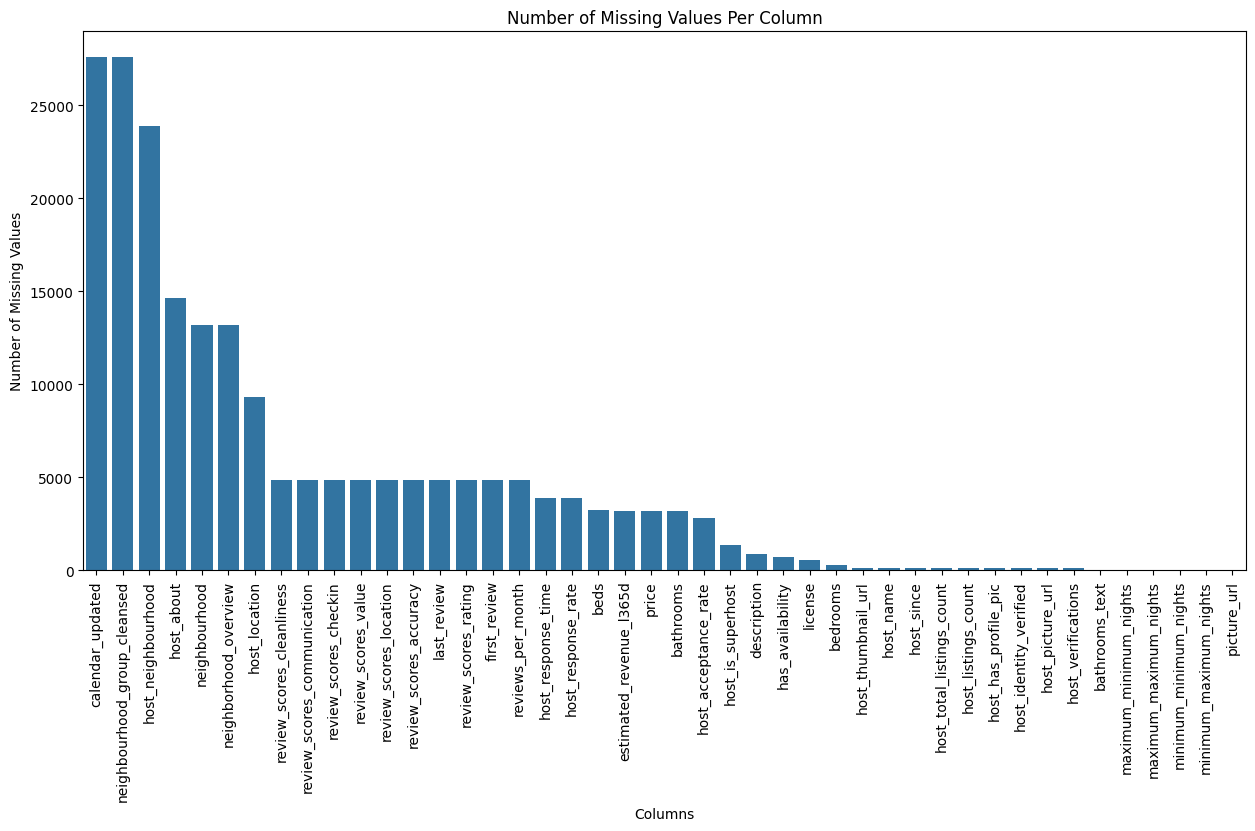

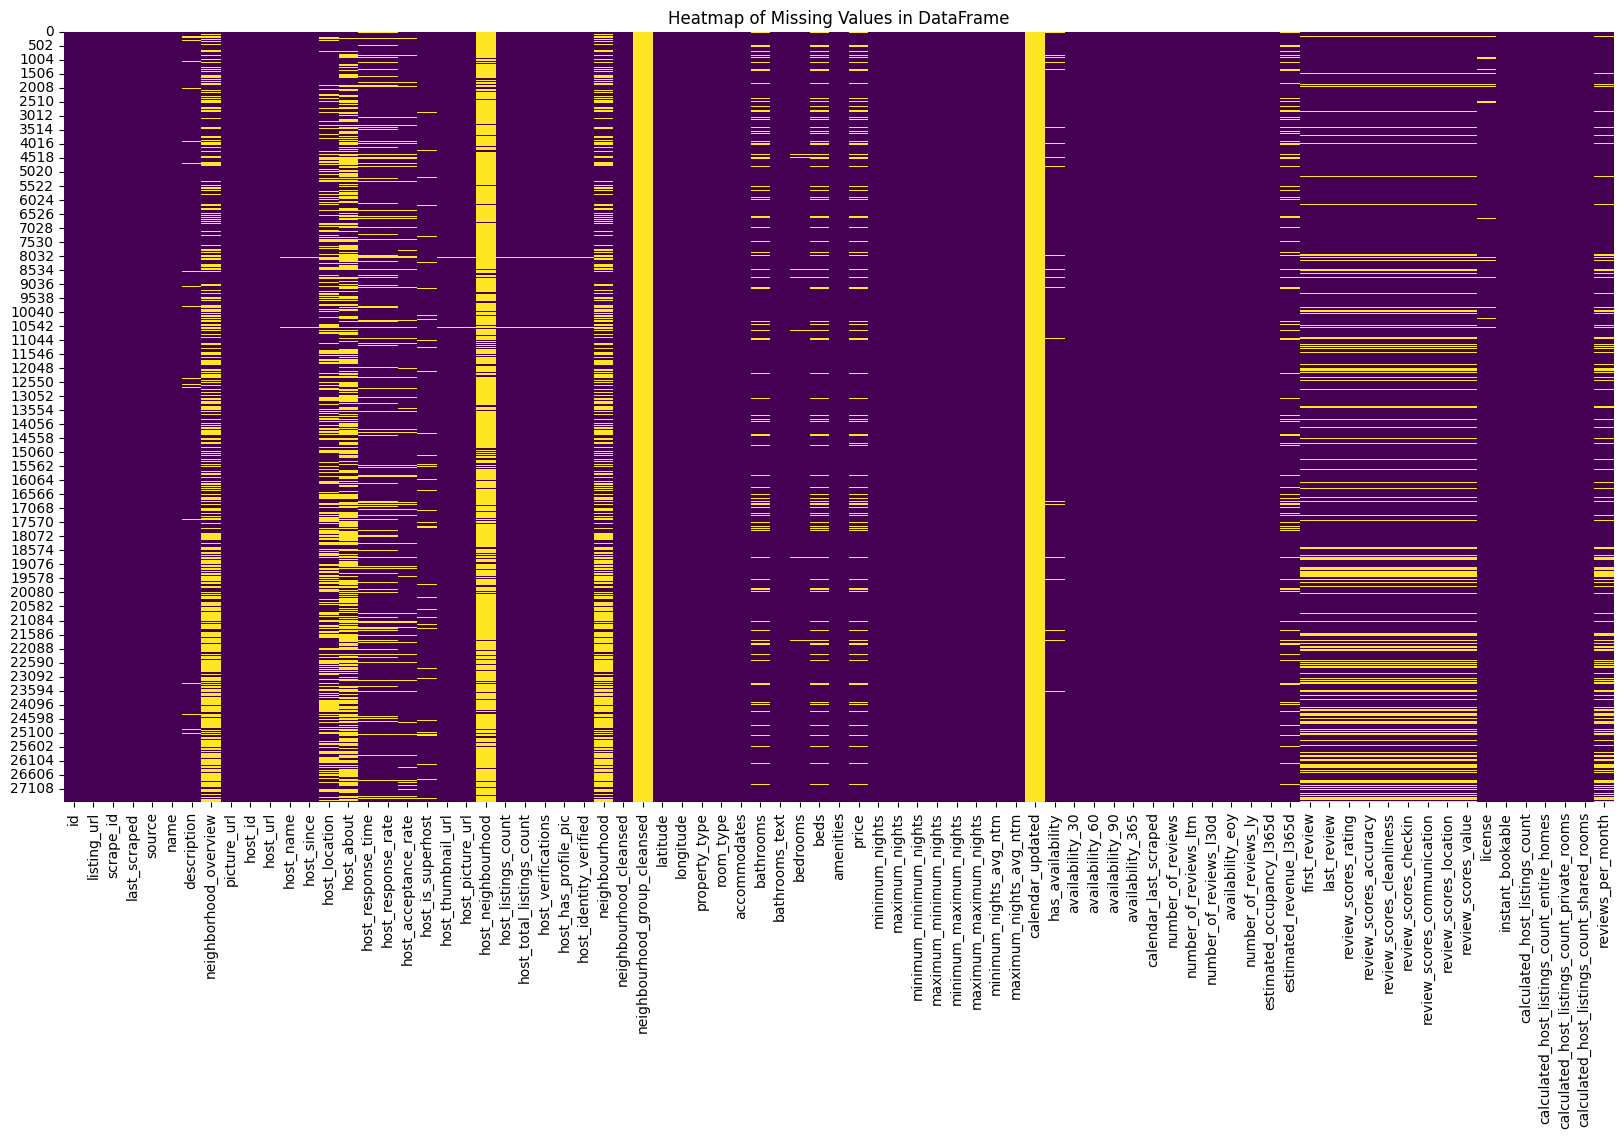

In [53]:
# Calculate null values for each column
missing_values = df.isnull().sum()

# Filter out columns with no missing values for better visualization
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Count of missing values per column (only showing columns with missing values):")
print(missing_values)

# Create a bar chart of missing values
plt.figure(figsize=(15, 7))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Number of Missing Values Per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

# Create a heatmap of missing values
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in DataFrame')
plt.show()

### ✍️ Your Response: 🔧
1. The top 3 columns with the most missing values are: 'calendar_update', neighbourhood_group_cleansed', and 'hotst_neightborhood'.

2. I bleive 'review_scores_rating' as well as 'price' and 'estimated_revenue_l365d'are most likely to create business issues.

3. I believe that 'calendar_updated', 'host_neighborhood', and 'neighborhood_group_cleansed' can be dropped due to having an abnormally high amount of missing values.


## 3. Drop Columns That Aren’t Useful

### Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

### Do the following:
Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [54]:
columns_to_drop = ['calendar_updated', 'host_neighbourhood', 'neighbourhood_group_cleansed']
df = df.drop(columns=columns_to_drop)

print("DataFrame after dropping columns (head):")
print(df.head())

print("\nDataFrame information after dropping columns:")
df.info()

DataFrame after dropping columns (head):
      id                         listing_url       scrape_id last_scraped  \
0  27966  https://www.airbnb.com/rooms/27966  20250928035310   2025-09-28   
1  29130  https://www.airbnb.com/rooms/29130  20250928035310   2025-09-29   
2  29849  https://www.airbnb.com/rooms/29849  20250928035310   2025-09-29   
3  29856  https://www.airbnb.com/rooms/29856  20250928035310   2025-09-29   
4  31023  https://www.airbnb.com/rooms/31023  20250928035310   2025-09-29   

            source                                               name  \
0      city scrape                       Heraklion-Pinelopi Apartment   
1      city scrape  Villa Kallergi-Athena,12 guest Concert Piano&Pool   
2      city scrape                  Villa Kallergi - Nefeli, 6 guests   
3  previous scrape              Matala Dimitris Villa - Four Bed Room   
4      city scrape            Chryssoula Guesthouse balcony (200mbps)   

                                         description  \
0

### ✍️ Your Response: 🔧
1. I droped 'calendar_updated', 'host_neighborhood', and 'neighborhood_group_cleansed' from my data set due to them having a high amount of missing values.

2. Calendar_update wasn't useful in addressing the business problem due to the fact that the majority of its values were missing. This would skew any analysis that could be done. As for host_neighborhood, it isn't useful due to its high missing value rate which causes the coulmn to be unable to provide a complete picture of host locations. As for 'neighborhood_group_cleansed' i dropped it due to its high amount of missing values thereby skewing the results.

3. If I were not to remove these columns, any conclusions that we gain will be firstly skewed which would lead us to make business decisions on faulty data.


## 4. Fill or Fix Values in Key Columns

### Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

### Do the following:
- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [55]:
# 1. Cleanse 'review_scores_rating' using median
median_review_score_rating = df['review_scores_rating'].median()
df['review_scores_rating'].fillna(median_review_score_rating, inplace=True)

print("\n--- Cleansing 'review_scores_rating' ---")
print(f"Median review score rating used for imputation: {median_review_score_rating}")
print(f"Number of missing values in 'review_scores_rating' after imputation: {df['review_scores_rating'].isnull().sum()}")
print("Summary statistics for 'review_scores_rating' after imputation:")
print(df['review_scores_rating'].describe())

# 2. Cleanse 'price' using median values
# First, convert 'price' to a numeric format by cleaning non-numeric characters
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

median_price = df['price'].median()
df['price'].fillna(median_price, inplace=True)

print("\n--- Cleansing 'price' ---")
print(f"Median price used for imputation: {median_price}")
print(f"Number of missing values in 'price' after imputation: {df['price'].isnull().sum()}")
print("Summary statistics for 'price' after imputation:")
print(df['price'].describe())


--- Cleansing 'review_scores_rating' ---
Median review score rating used for imputation: 4.94
Number of missing values in 'review_scores_rating' after imputation: 0
Summary statistics for 'review_scores_rating' after imputation:
count    27582.000000
mean         4.853131
std          0.289778
min          1.000000
25%          4.830000
50%          4.940000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

--- Cleansing 'price' ---
Median price used for imputation: 108.0
Number of missing values in 'price' after imputation: 0
Summary statistics for 'price' after imputation:
count    27582.000000
mean       243.199695
std        841.689205
min         15.000000
25%         74.000000
50%        108.000000
75%        186.000000
max      21234.000000
Name: price, dtype: float64


/tmp/ipython-input-4167108893.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_scores_rating'].fillna(median_review_score_rating, inplace=True)
/tmp/ipython-input-4167108893.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

### ✍️ Your Response: 🔧
1. I cleaned 'price' and 'review_score_rating' columns.

2. I used median to fill them because it doesn't radically distort the data in either extreme thereby keeping the data as accurate as possible.

3. Some possible issues with using median as a way to 'clean' the columns are distortion of distribution; which reduces the imact of more extreme values, underestimation of uncertainty; where by using median i created a 'certainty' where there may not have been one, and a final issue is that by using a 'median' I create a bias if the missingness is not random.


## 5. Convert and Clean Data Types

### Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

### Do the following:
- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


In [57]:
# Clean and convert 'host_acceptance_rate'
# 1. Convert to string, remove '%' sign, and then convert to numeric
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(str).str.replace('%', '', regex=False)
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'], errors='coerce')

# 2. Convert to decimal (divide by 100)
df['host_acceptance_rate'] = df['host_acceptance_rate'] / 100

# 3. Fill missing values with the median
median_acceptance_rate = df['host_acceptance_rate'].median()
df['host_acceptance_rate'].fillna(median_acceptance_rate, inplace=True)

print("\n--- Cleaning 'host_acceptance_rate' ---")
print(f"Median host acceptance rate used for imputation: {median_acceptance_rate}")
print(f"Number of missing values in 'host_acceptance_rate' after cleaning: {df['host_acceptance_rate'].isnull().sum()}")
print("Summary statistics for 'host_acceptance_rate' after cleaning:")
print(df['host_acceptance_rate'].describe())


--- Cleaning 'host_acceptance_rate' ---
Median host acceptance rate used for imputation: 1.0
Number of missing values in 'host_acceptance_rate' after cleaning: 0
Summary statistics for 'host_acceptance_rate' after cleaning:
count    27582.000000
mean         0.934016
std          0.189311
min          0.000000
25%          0.990000
50%          1.000000
75%          1.000000
max          1.000000
Name: host_acceptance_rate, dtype: float64


/tmp/ipython-input-952577616.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_acceptance_rate'].fillna(median_acceptance_rate, inplace=True)


### ✍️ Your Response: 🔧
1. One column with the wrong data type is 'host_acceptance_rate'.

2. Firstly, i converted it to a string, removed the '%' sign, and then converted it to numeric. Secondly i converted it to decimal form. Finally i filled the missing values with the median.

3. Converting this column is crucial for us becuase if we don't convert it then we can't run further analysis.

## 6. Remove Duplicate Records

### Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

### Do the following:
- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [58]:
# Check for exact duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicate_rows}")

# Check for duplicate 'id' values
duplicate_ids = df['id'].duplicated().sum()
print(f"Number of duplicate 'id' values: {duplicate_ids}")

# Remove duplicate rows (keeping the first occurrence)
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print(f"Removed {duplicate_rows} exact duplicate rows.")

# Remove rows with duplicate 'id' values (if different from exact duplicates and keeping first)
# It's important to keep the first occurrence as typically the 'id' represents a unique listing
if duplicate_ids > 0:
    # Only drop based on 'id' if there are actual ID duplicates that are not already handled by full row duplicates
    # This ensures each ID is truly unique
    df.drop_duplicates(subset=['id'], inplace=True)
    print(f"Removed {duplicate_ids} rows with duplicate 'id' values.")

print("\nDataFrame shape after removing duplicates:")
print(df.shape)
print("\nFirst 5 rows after duplicate removal:")
print(df.head())

Number of exact duplicate rows: 0
Number of duplicate 'id' values: 0

DataFrame shape after removing duplicates:
(27582, 76)

First 5 rows after duplicate removal:
      id                         listing_url       scrape_id last_scraped  \
0  27966  https://www.airbnb.com/rooms/27966  20250928035310   2025-09-28   
1  29130  https://www.airbnb.com/rooms/29130  20250928035310   2025-09-29   
2  29849  https://www.airbnb.com/rooms/29849  20250928035310   2025-09-29   
3  29856  https://www.airbnb.com/rooms/29856  20250928035310   2025-09-29   
4  31023  https://www.airbnb.com/rooms/31023  20250928035310   2025-09-29   

            source                                               name  \
0      city scrape                       Heraklion-Pinelopi Apartment   
1      city scrape  Villa Kallergi-Athena,12 guest Concert Piano&Pool   
2      city scrape                  Villa Kallergi - Nefeli, 6 guests   
3  previous scrape              Matala Dimitris Villa - Four Bed Room   
4      c

### ✍️ Your Response: 🔧 🔧
1. No, i did not find any exact duplicate rows or duplicate id values in my dataset.

2. Since there was no duplicates i didn't have to add or drop anything.

3. Duplicates are risky becuase they can inflate metrics and key KPIs, as well as leading to mislead alaysiss, and it creates operational inefficiencies. In the eyes of a business order, duplicate bookings can lead to lost bookings and therefor revenue. Addittionally, it could create customer service issues due to them booking on the 'faulty' site and then blame the true booking.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

### Do the following:
Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data_6.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





In [59]:
df.to_csv("cleaned_airbnb_data_6.csv", index=False)

## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. What surprised me the most was how easy it was using the help of AI to idendtify missing values and then 'fixing' them so that they can be used to do business analytics.
2. I dropped columns that had an exorbant amount of missing values, I fixed columns that had minimal amount of missing values, and i kept ones that were had none or very close to no missing values.
3. I believe that one way a business team can benefit more specifically from their pricing operations is that by cleaning the data they can significantly improve their pricing forcast models which enables them to better understand the market and allows them to provide data-backed business recommendations to hosts.
4. If i had more time I would check every column and clean it, secondly i would add more charts/graphs so i can better understand the data.
5. This doesn't directly relate to my customized learning outcome but it helps me figure out how to make my data more accurate thereby allowing me to make more accurate data visualizations.


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [61]:
!jupyter nbconvert --to html "assignment_06_data_cleaning.ipynb"

[NbConvertApp] Converting notebook assignment_06_data_cleaning.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 802619 bytes to assignment_06_data_cleaning.html


# Task
Calculate the sum of null values for each column in the `df` DataFrame, visualize the null value counts using a bar chart, and create a heatmap to show the presence of null values across the entire DataFrame.

## Calculate and Visualize Missing Values

### Subtask:
Calculate the sum of null values for each column in the DataFrame and then visualize these counts using a bar chart. Additionally, create a heatmap to show the presence of null values across the entire DataFrame for a comprehensive view.


## Summary:

### Data Analysis Key Findings
*   The analysis identified the presence and count of missing values across various columns in the dataset.
*   A bar chart was generated to visually represent the number of null values for each column, allowing for a quick comparison of data completeness.
*   A heatmap was created to provide a comprehensive visual overview of the distribution and patterns of missing values throughout the entire DataFrame.

### Insights or Next Steps
*   Understanding the extent and distribution of missing data is crucial for deciding appropriate data cleaning and imputation strategies (e.g., dropping columns/rows, mean imputation, or more sophisticated methods).
*   Investigate the reasons behind the missing values in specific columns, as this could provide valuable insights into data collection processes or potential biases.


# Task
Export the cleaned `df` DataFrame to a CSV file named "cleaned_airbnb_data_6.csv" without the index.

## Export Cleaned Data

### Subtask:
Export the cleaned 'df' DataFrame to a CSV file named 'cleaned_airbnb_data_6.csv' without the index.


## Summary:

### Data Analysis Key Findings
*   The cleaned `df` DataFrame was successfully exported to a CSV file named `cleaned_airbnb_data_6.csv`.
*   The index column was explicitly excluded during the export process.

### Insights or Next Steps
*   The `cleaned_airbnb_data_6.csv` file is now ready for subsequent data analysis, visualization, or machine learning model training.
